In [5]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#creates dataframe and removes rows Unnamed 615-638 (they are empty)
df = pd.read_csv('tfExp.csv',header=0,index_col=0)

In [3]:
tfStartId = ['430', '1052', '1053', '1385', '84699', '9586', '1871', '1874', '144455', '79733', '1960', '1997', '2002', '2004', '80712', '2114', '2115', '2120', '51513', '2551', '2623', '2624', '2625', '9421', '3232', '10320', '3659', '3662', '3670', '91464', '3726', '10661', '11278', '128209', '10365', '9314', '1316', '51176', '9935', '23269', '4602', '4774', '4790', '7025', '9480', '5468', '5914', '5916', '3516', '5971', '864', '6257', '4093', '6659', '6660', '6662', '25803', '347853', '30009', '9496', '6929', '6925', '8463', '7022', '29842', '10155', '6935', '132625', '23051', '85416', '7707', '7764', '23528', '201516']

In [24]:
#lists to store r and p values
pList = []
rList = []
key1List = []
key2List = []
logpList = []
#iterate through all ids.
for key in df.index.values:
    if(str(key) in tfStartId): #filter out unwanted IDs
        row1 = df.loc[key]
        #iterate through all ids for second comparison.
        for key2 in df.index.values:
            if key2 != key and (str(key2) in tfStartId):
                    row2 = df.loc[key2]
                    #person r function
                    p = stats.pearsonr(row1,row2)
                    key1List.append(key)
                    key2List.append(key2)
                    rList.append(p[0])
                    pList.append(p[1]) 

In [25]:
pList[0:5]

[4.2250886111731903e-62,
 3.4503773163325931e-23,
 3.9566525053266772e-13,
 0.012265727334629769,
 6.3654934197853241e-05]

In [17]:
print stats.skew(rList)
print stats.skewtest(rList)

0.568716250742
SkewtestResult(statistic=15.946322403409399, pvalue=3.0217524972431231e-57)


In [37]:
#logarithmic transformation.              
for x in pList:
    logpList.append(-math.log10(x))

In [43]:
#FDR calculating the corrected pList.
size = len(pList)
rankValue = dict(zip(np.argsort(pList),range(len(pList))))
correctPList = range(len(pList))
for i in range(len(pList)):
    correctPList[i] = pList[i]*(float(len(pList))/(rankValue[i]+1))

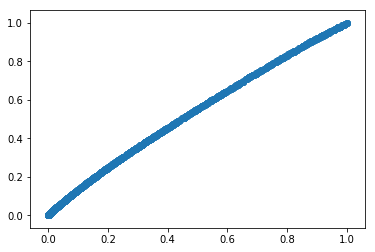

In [39]:
plt.scatter(pList,correctPList)
plt.show()

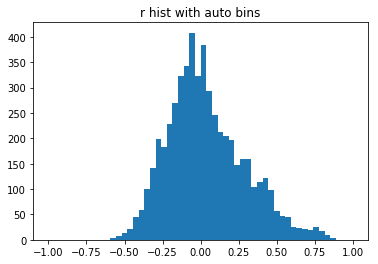

In [40]:
#create and show histogram of r values from 0 to 1
plt.hist(rList,bins='auto',range=(-1,1))
plt.title("r hist with auto bins")
plt.show()

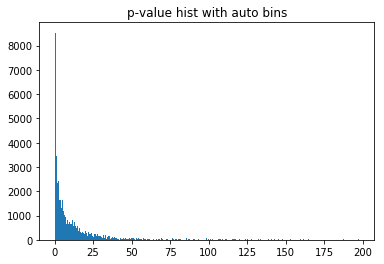

In [41]:
#create and show histogram of p values from 0 to 1
#binList = [0,0.01,0.02,0.03,0.04,0.05]#custom bin range.
plt.hist(logpList,bins='auto') #range=(0,1))
plt.title("p-value hist with auto bins")
plt.show()

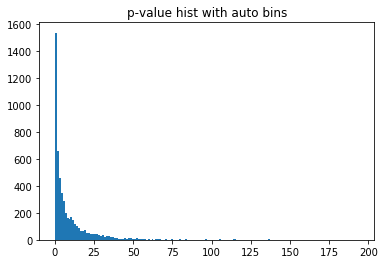

In [42]:
plt.hist([-math.log10(i) for i in correctPList],bins='auto') #range=(0,1))
plt.title("p-value hist with auto bins")
plt.show()